In [1]:
#animation both m & b

from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

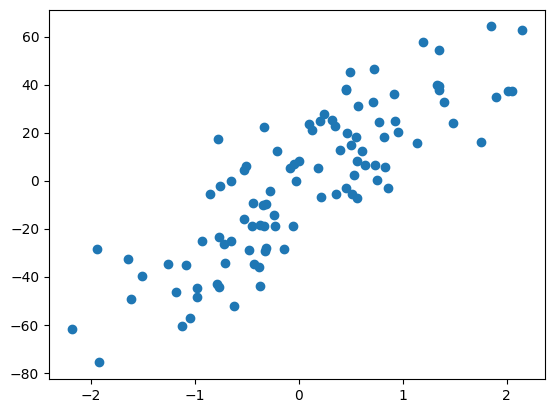

In [2]:
# Generate dataset
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
X = X.ravel()  # Flatten X for easier computation
plt.scatter(X, y)
plt.show()

In [3]:
# Initialize parameters
b = -120
m = 100
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

# Training loop
for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(len(X)):
        slope_b += -2 * (y[j] - (m * X[j]) - b)
        slope_m += -2 * (y[j] - (m * X[j]) - b) * X[j]
        cost += (y[j] - m * X[j] - b) ** 2

    b -= lr * slope_b
    m -= lr * slope_m
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

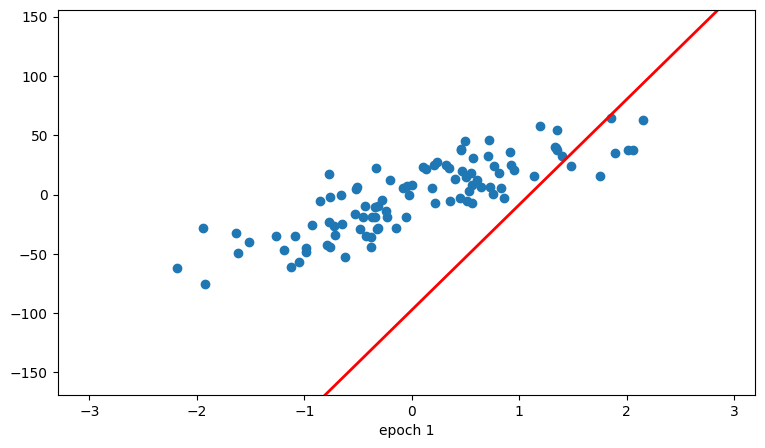

In [4]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation4.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)
